In [25]:
""" Image pyramid """
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
""" Load dataset"""
# Read image
fpath = 'SDS/Day2/ex2-3_image_pyramids'
img = cv2.imread(fpath + '/sample.jpg', cv2.IMREAD_GRAYSCALE)

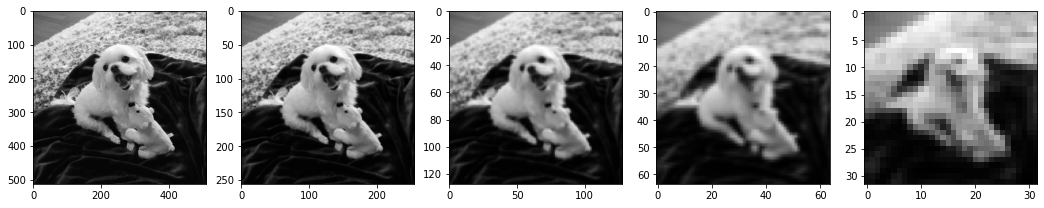

In [27]:
""" Gaussian pyramid """
# Gaussian pyramid
level = 4
g_pyr = []

for current_level in range(level):
    if current_level < 1:
        g = cv2.pyrDown(img)
        g_pyr.append(g)
    else:
        g = cv2.pyrDown(g_pyr[current_level-1])
        g_pyr.append(g)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(g_pyr[0], 'gray')
plt.subplot(153), plt.imshow(g_pyr[1], 'gray')
plt.subplot(154), plt.imshow(g_pyr[2], 'gray')
plt.subplot(155), plt.imshow(g_pyr[3], 'gray')
plt.show()

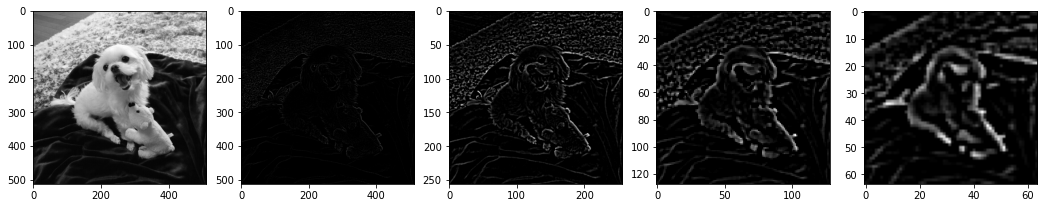

In [28]:
""" Laplacian pyramid """
# Laplacian pyramid
level = 4
l_pyr = []

for current_level in range(level):
    if current_level < 1:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(img, fg)
        l_pyr.append(lap)
    else:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(g_pyr[current_level-1], fg)
        l_pyr.append(lap)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(l_pyr[0], 'gray')
plt.subplot(153), plt.imshow(l_pyr[1], 'gray')
plt.subplot(154), plt.imshow(l_pyr[2], 'gray')
plt.subplot(155), plt.imshow(l_pyr[3], 'gray')
plt.show()

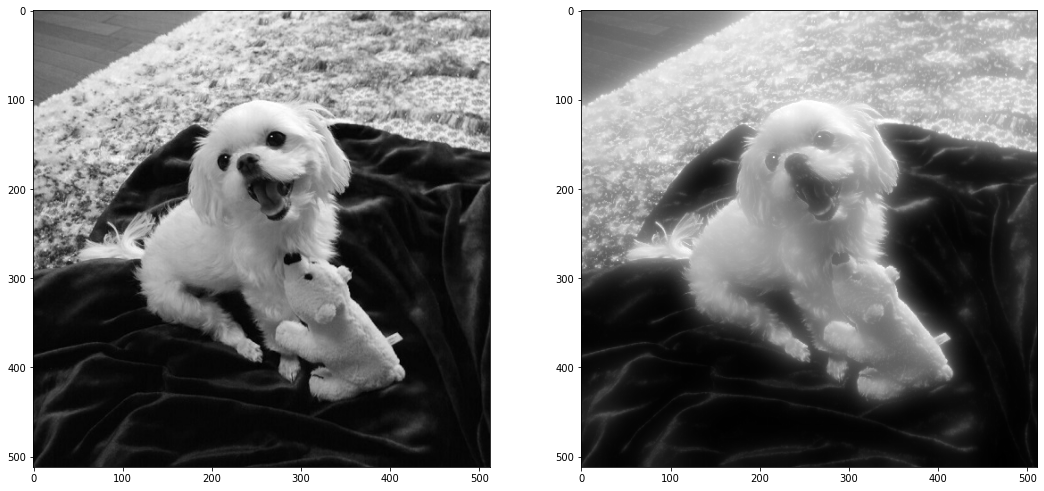

In [29]:
""" Reconstruction using pyramid """
# Reconstruction using pyramids
level = 4

plt.figure(figsize=(18, 18))
r_pyr = g_pyr[level-1]
for current_level in range(level):
    r_pyr = cv2.pyrUp(r_pyr)
    r_pyr = cv2.add(r_pyr, l_pyr[level-current_level-1])

plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(r_pyr, 'gray')
plt.show()


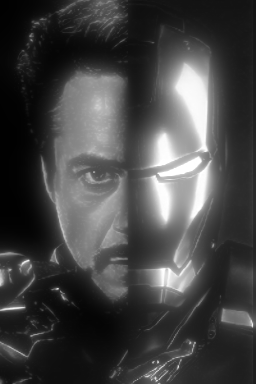

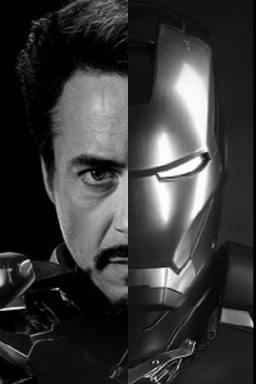

In [ ]:
""" Image pyramid """
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

A = cv2.imread('./tony.png', cv2.IMREAD_GRAYSCALE)
B = cv2.imread('./iron.png', cv2.IMREAD_GRAYSCALE)

""" for image A """
G = A.copy()
gpA = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpA.append(G)

lpA = [gpA[4]]
for i in range(4,0,-1):
    GE = cv2.pyrUp(gpA[i])
    temp = cv2.resize(gpA[i-1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp,GE)
    lpA.append(L)

""" for image B """
G = B.copy()
gpB = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpB.append(G)

lpB = [gpB[4]]
for i in range(4,0,-1):
    GE = cv2.pyrUp(gpB[i])
    temp = cv2.resize(gpB[i - 1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp, GE)
    lpB.append(L)

""" fusing """
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

ls_ = LS[0]
for i in range(1,5):
    ls_ = cv2.pyrUp(ls_)
    temp = cv2.resize(LS[i],(ls_.shape[:2][1], ls_.shape[:2][0]))
    ls_ = cv2.add(ls_, temp)

""" hard concatenating """
real = np.hstack((A[:,:int(cols/2)],B[:,int(cols/2):]))

cv2_imshow(ls_)
cv2_imshow(real)

In [1]:
!git clone https://github.com/jelee2498/SDS.git

Cloning into 'SDS'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 218 (delta 9), reused 50 (delta 9), pack-reused 168
Receiving objects: 100% (218/218), 262.33 MiB | 36.91 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
fpath = 'SDS/Day2/ex2-3_image_pyramids'

""" Image pyramid """
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

A = cv2.imread(fpath + '/tony.png', cv2.IMREAD_GRAYSCALE)
B = cv2.imread(fpath + '/iron.png', cv2.IMREAD_GRAYSCALE)
assert A is not None
assert B is not None

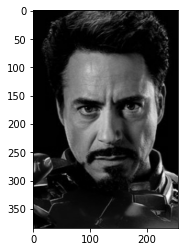

In [3]:
plt.imshow(A, cmap='gray')

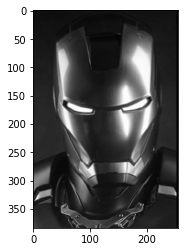

In [4]:
plt.imshow(B, cmap='gray')

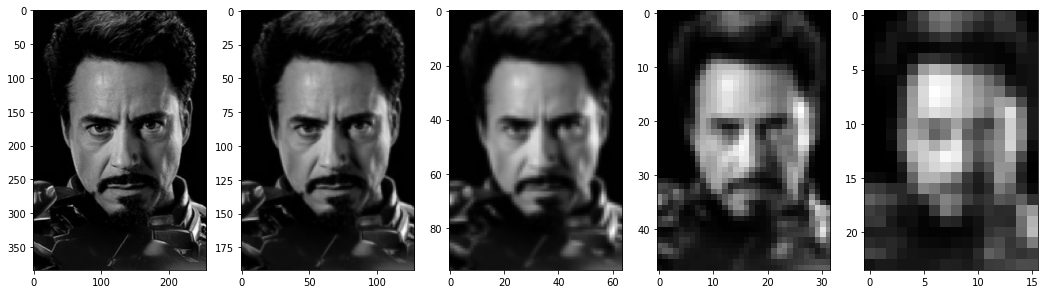

In [8]:
""" Gaussian pyramid """
img = A
# Gaussian pyramid
level = 4
g_pyr = []

for current_level in range(level):
    if current_level < 1:
        g = cv2.pyrDown(img)
        g_pyr.append(g)
    else:
        g = cv2.pyrDown(g_pyr[current_level-1])
        g_pyr.append(g)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(g_pyr[0], 'gray')
plt.subplot(153), plt.imshow(g_pyr[1], 'gray')
plt.subplot(154), plt.imshow(g_pyr[2], 'gray')
plt.subplot(155), plt.imshow(g_pyr[3], 'gray')
plt.show()

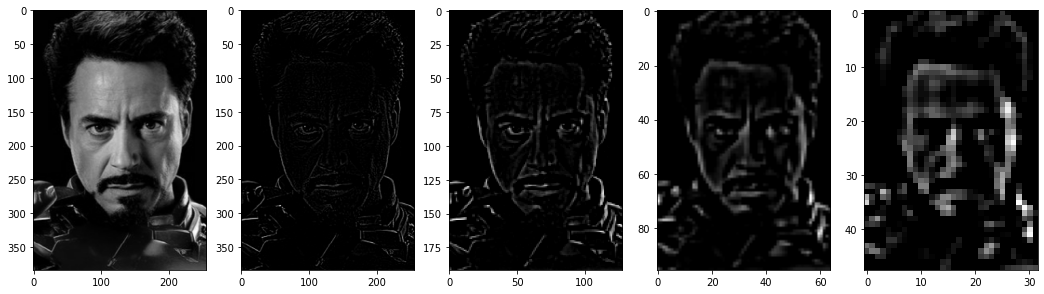

In [9]:
""" Laplacian pyramid """
img = A
# Laplacian pyramid
level = 4
l_pyr = []

for current_level in range(level):
    if current_level < 1:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(img, fg)
        l_pyr.append(lap)
    else:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(g_pyr[current_level-1], fg)
        l_pyr.append(lap)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(l_pyr[0], 'gray')
plt.subplot(153), plt.imshow(l_pyr[1], 'gray')
plt.subplot(154), plt.imshow(l_pyr[2], 'gray')
plt.subplot(155), plt.imshow(l_pyr[3], 'gray')
plt.show()

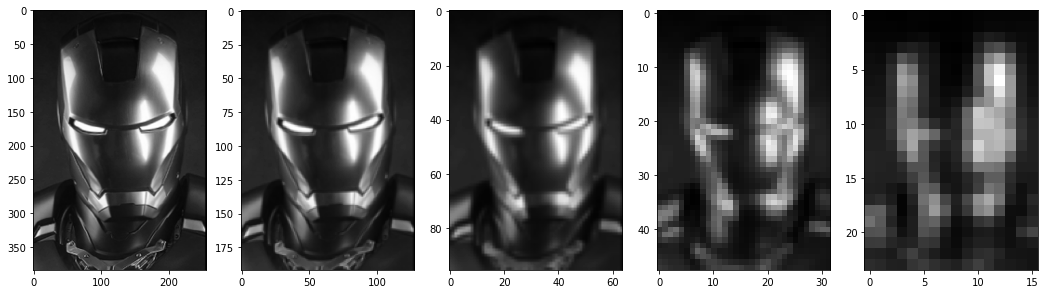

In [10]:
""" Gaussian pyramid """
img = B
# Gaussian pyramid
level = 4
g_pyr = []

for current_level in range(level):
    if current_level < 1:
        g = cv2.pyrDown(img)
        g_pyr.append(g)
    else:
        g = cv2.pyrDown(g_pyr[current_level-1])
        g_pyr.append(g)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(g_pyr[0], 'gray')
plt.subplot(153), plt.imshow(g_pyr[1], 'gray')
plt.subplot(154), plt.imshow(g_pyr[2], 'gray')
plt.subplot(155), plt.imshow(g_pyr[3], 'gray')
plt.show()

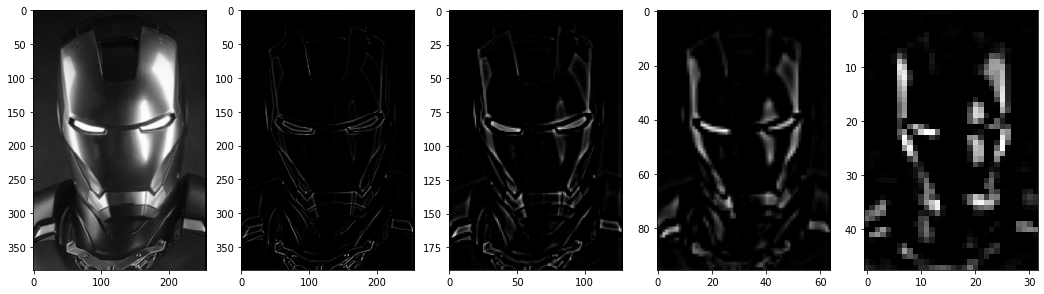

In [11]:
""" Laplacian pyramid """
img = B
# Laplacian pyramid
level = 4
l_pyr = []

for current_level in range(level):
    if current_level < 1:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(img, fg)
        l_pyr.append(lap)
    else:
        fg = cv2.pyrUp(g_pyr[current_level])
        lap = cv2.subtract(g_pyr[current_level-1], fg)
        l_pyr.append(lap)

plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(img, 'gray')
plt.subplot(152), plt.imshow(l_pyr[0], 'gray')
plt.subplot(153), plt.imshow(l_pyr[1], 'gray')
plt.subplot(154), plt.imshow(l_pyr[2], 'gray')
plt.subplot(155), plt.imshow(l_pyr[3], 'gray')
plt.show()

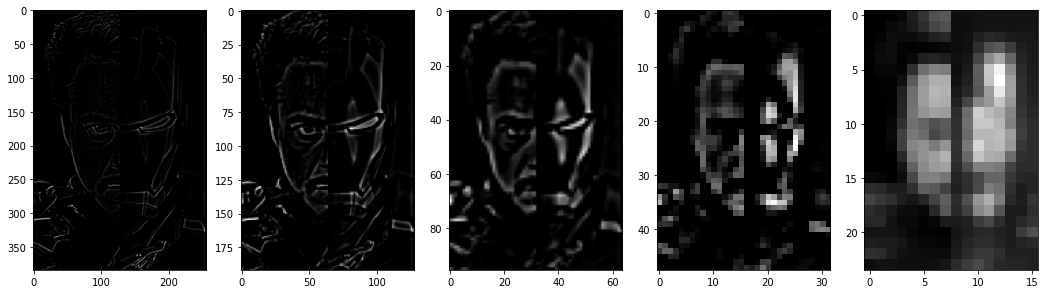

In [16]:
""" Laplacian pyramid """

""" for image A """
G = A.copy()
gpA = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpA.append(G)

lpA = [gpA[4]]
for i in range(4,0,-1):
    GE = cv2.pyrUp(gpA[i])
    temp = cv2.resize(gpA[i-1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp,GE)
    lpA.append(L)

""" for image B """
G = B.copy()
gpB = [G]
for i in range(5):
    G = cv2.pyrDown(G)
    gpB.append(G)

lpB = [gpB[4]]
for i in range(4,0,-1):
    GE = cv2.pyrUp(gpB[i])
    temp = cv2.resize(gpB[i - 1], (GE.shape[:2][1], GE.shape[:2][0]))
    L = cv2.subtract(temp, GE)
    lpB.append(L)

""" fusing """
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols = la.shape
    ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
    LS.append(ls)

l_pyr = LS
plt.figure(figsize=(18, 18))
plt.subplot(151), plt.imshow(l_pyr[4], 'gray')
plt.subplot(152), plt.imshow(l_pyr[3], 'gray')
plt.subplot(153), plt.imshow(l_pyr[2], 'gray')
plt.subplot(154), plt.imshow(l_pyr[1], 'gray')
plt.subplot(155), plt.imshow(l_pyr[0], 'gray')
plt.show()

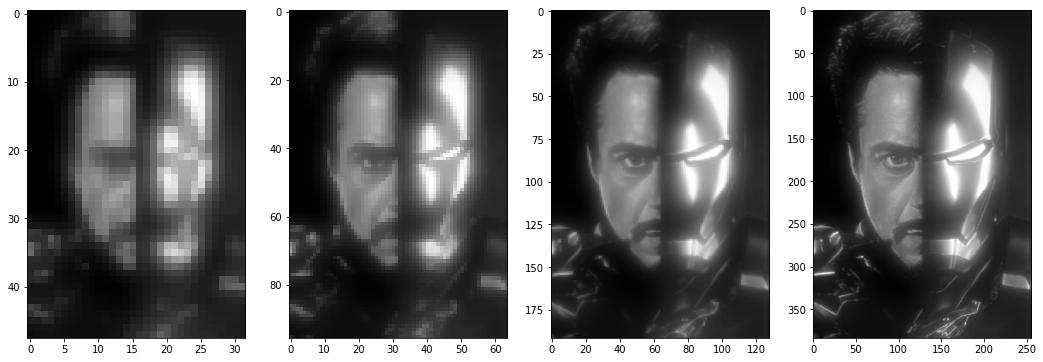

In [20]:
plt.figure(figsize=(18, 18))
ls_ = LS[0]
for i in range(1,5):
    ls_ = cv2.pyrUp(ls_)
    temp = cv2.resize(LS[i],(ls_.shape[:2][1], ls_.shape[:2][0]))
    ls_ = cv2.add(ls_, temp)
    plt.subplot(140 + i), plt.imshow(ls_, cmap='gray')
plt.show()

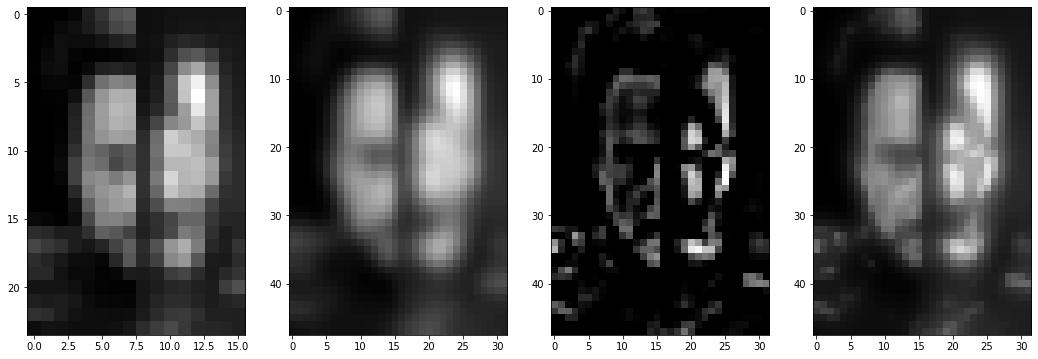

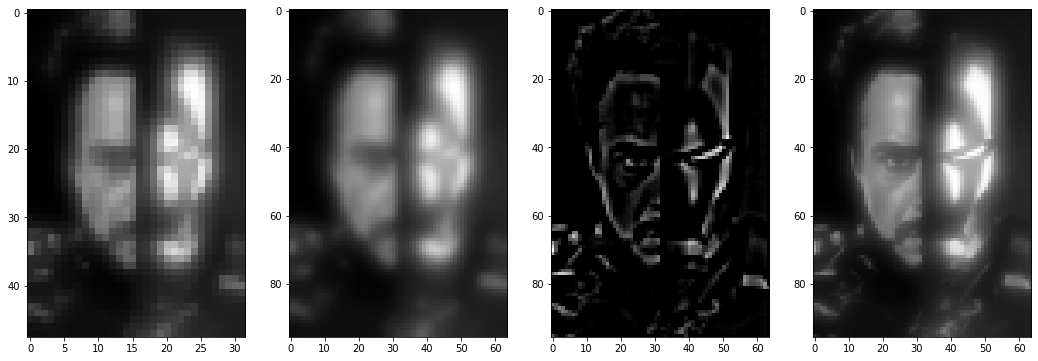

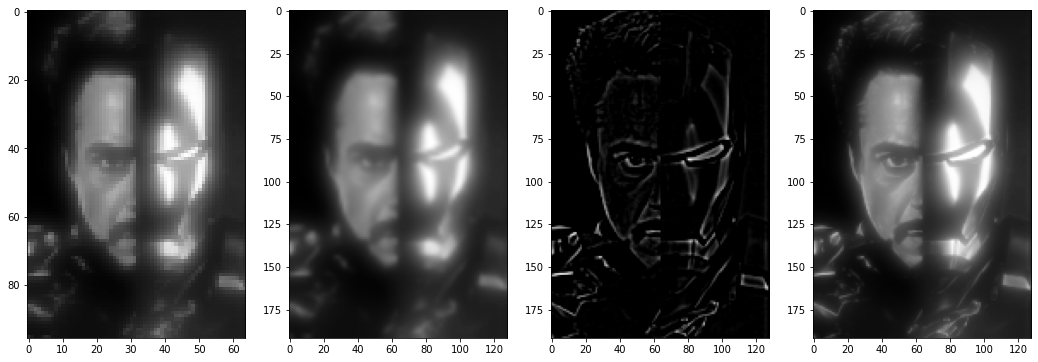

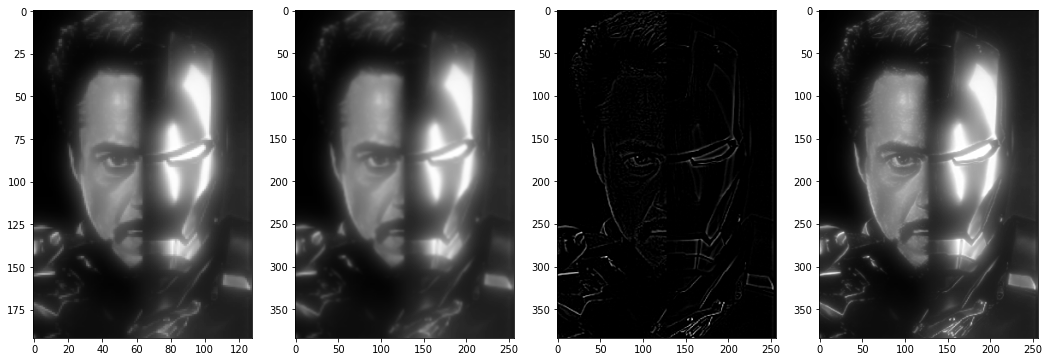

In [23]:
ls_ = LS[0]
for i in range(1,5):
    plt.figure(figsize=(18, 18))
    plt.subplot(141), plt.imshow(ls_, cmap='gray')
    ls_ = cv2.pyrUp(ls_)
    plt.subplot(142), plt.imshow(ls_, cmap='gray')
    temp = cv2.resize(LS[i],(ls_.shape[:2][1], ls_.shape[:2][0]))
    plt.subplot(143), plt.imshow(temp, cmap='gray')
    ls_ = cv2.add(ls_, temp)
    plt.subplot(144), plt.imshow(ls_, cmap='gray')
    plt.show()